In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import warnings
import os 
import cv2
warnings.filterwarnings(action='ignore')

In [2]:
os.getcwd()

'/home/elice/project-cyberdyne/ai/EDA'

# Validation set check

In [3]:
%cd ../../../dataset/validation-labels-src

/home/elice/dataset/validation-labels-src


In [4]:
import json

In [5]:
category_condition_G=dict()
category_condition_B=dict()
st_python=dict()
filepath_ceramic=[]
filepath_bottle=[]
for dirpath, dirnames,filenames in os.walk(os.curdir):

    for filename in filenames :
        path=os.path.join(dirpath,filename)
#         print(path)
        with open(path, "r") as st_json:

            st_python = json.load(st_json)
#             print(st_python)
            if st_python['Bounding'][0]['DAMAGE'] =="원형" :
                category_condition_G[st_python['Bounding'][0]['CLASS']]=category_condition_G.get(st_python['Bounding'][0]['CLASS'],0)+1
            else :
                category_condition_B[st_python['Bounding'][0]['CLASS']]=category_condition_B.get(st_python['Bounding'][0]['CLASS'],0)+1
                if st_python['Bounding'][0]['CLASS'] == "도기류" :
                    filepath_ceramic.append(dirpath+'/'+st_python['FILE NAME'])
                if st_python['Bounding'][0]['CLASS'] == "유리병류" :
                    filepath_bottle.append(dirpath+'/'+st_python['FILE NAME'])
# print(st_python)
# print(filepath_ceramic)
# print(filepath_bottle)

print("도기류 : ", category_condition_G['도기류']+category_condition_B['도기류'], '원형 : ',category_condition_G['도기류'],'변형 :', category_condition_B['도기류'], '변형율 : ',round(category_condition_B['도기류']/(category_condition_B['도기류']+category_condition_G['도기류'])*100,2))
print("유리병류 : ", category_condition_G['유리병류']+category_condition_B['유리병류'], '원형 : ',category_condition_G['유리병류'],'변형 :', category_condition_B['유리병류'], '변형율 : ',round(category_condition_B['유리병류']/(category_condition_B['유리병류']+category_condition_G['유리병류'])*100,2))

도기류 :  5073 원형 :  4766 변형 : 307 변형율 :  6.05
유리병류 :  5304 원형 :  5262 변형 : 42 변형율 :  0.79


In [6]:
%cd ../validation

/home/elice/dataset/validation


In [7]:
from tqdm import tqdm
import random
img_arrays=[]

for file in tqdm(filepath_ceramic):
    img=cv2.imread(file)
    img = cv2.resize(img, (64, 64))
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_arrays.append(np.array(img))
random.seed(1024)
img_arrays=random.sample(img_arrays, 40)
validation_img_ceramic=np.array(img_arrays)

100%|████████████████████████████████████████████████████████████████████████████████| 307/307 [00:01<00:00, 187.19it/s]


In [8]:
img_arrays=[]

for file in tqdm(filepath_bottle):
    img=cv2.imread(file)
    img = cv2.resize(img, (64, 64))
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_arrays.append(np.array(img))
random.seed(1024)
img_arrays=random.sample(img_arrays, 40)
validation_img_bottle=np.array(img_arrays)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 188.02it/s]


In [9]:
# len(validation_img)

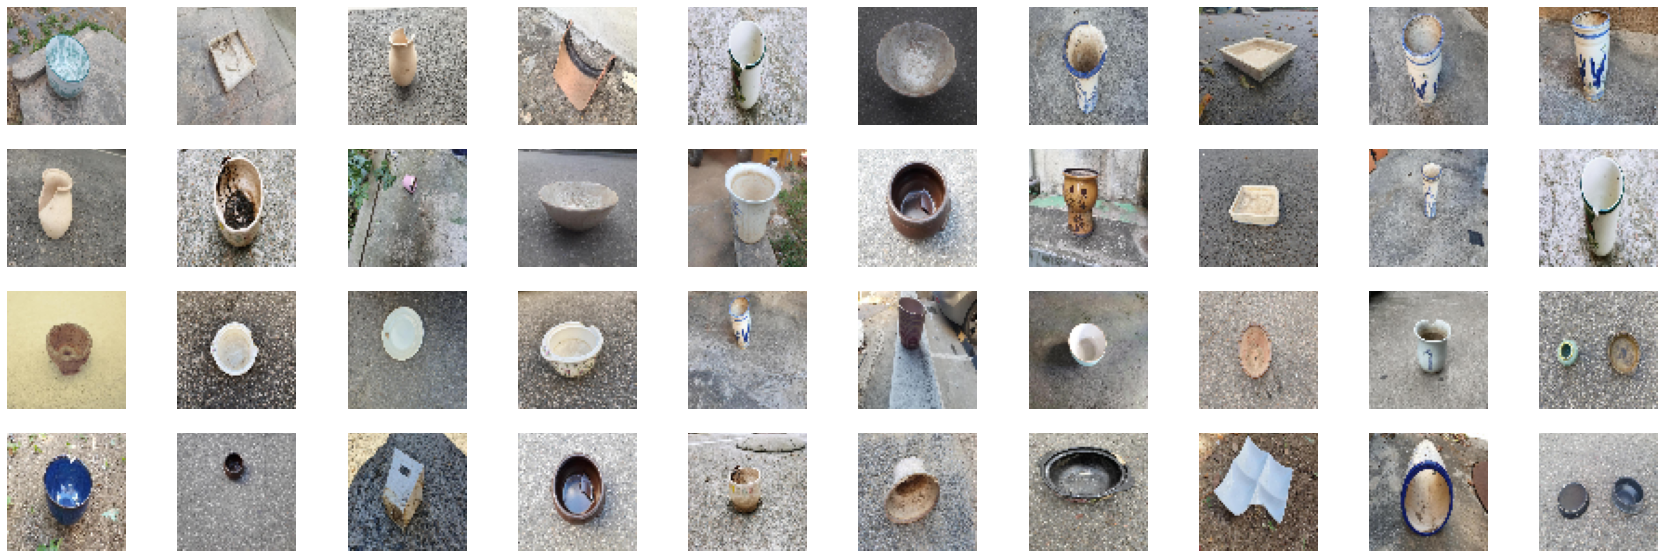

In [10]:
plt.figure(figsize=(30,10))

for n in range(len(validation_img_ceramic)):
    img = validation_img_ceramic[n]
    plt.subplot(4, 10, n+1)  #행은 class수 열은 시각화할 개수
    plt.imshow(img, cmap=plt.cm.binary)
    plt.axis("off")

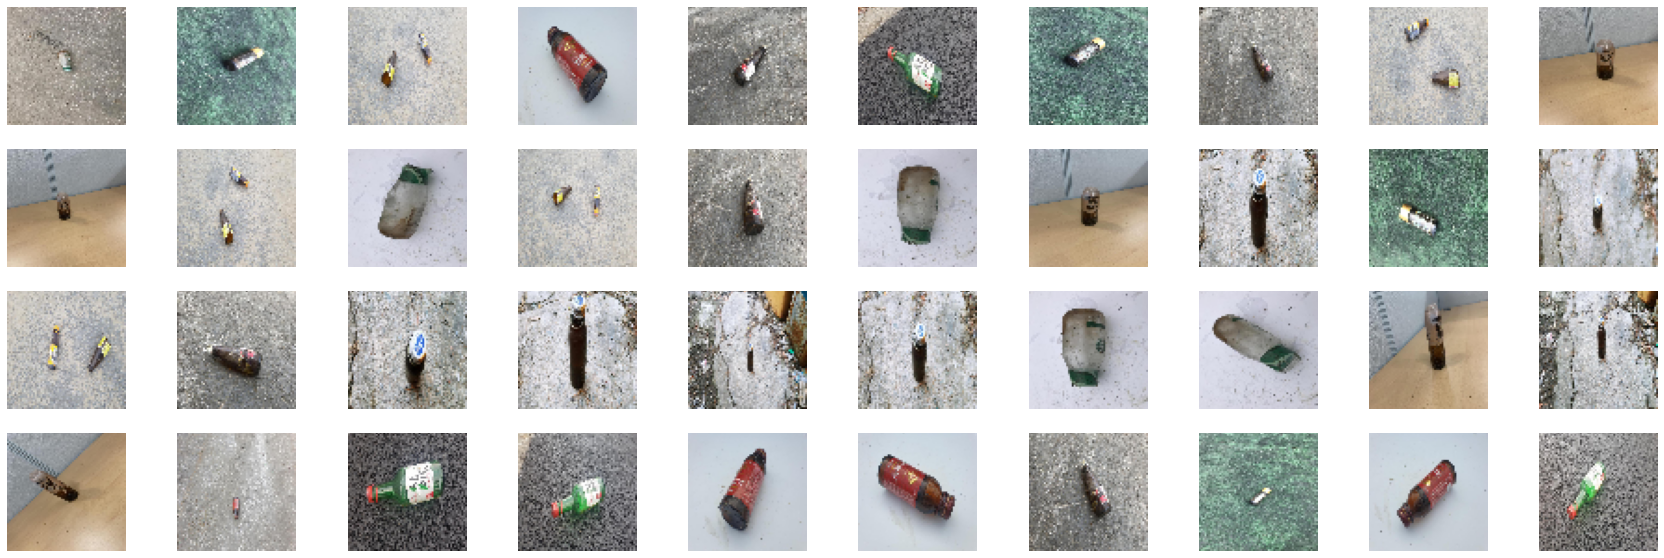

In [11]:
plt.figure(figsize=(30,10))
for n in range(len(validation_img_bottle)):
    img = validation_img_bottle[n]
    plt.subplot(4, 10, n+1)  #행은 class수 열은 시각화할 개수
    plt.imshow(img, cmap=plt.cm.binary)
    plt.axis("off")

In [12]:
%cd ../training-labels-src

/home/elice/dataset/training-labels-src


In [15]:
category_condition_G=dict()
category_condition_B=dict()
st_python=dict()
filepath_ceramic=[]
filepath_bottle=[]
for dirpath, dirnames,filenames in os.walk(os.curdir):

    for filename in filenames :
        path=os.path.join(dirpath,filename)
#         print(path)
        with open(path, "r") as st_json:

            st_python = json.load(st_json)
#             print(st_python)
            if st_python['Bounding'][0]['DAMAGE'] =="원형" :
                category_condition_G[st_python['Bounding'][0]['CLASS']]=category_condition_G.get(st_python['Bounding'][0]['CLASS'],0)+1
            else :
                category_condition_B[st_python['Bounding'][0]['CLASS']]=category_condition_B.get(st_python['Bounding'][0]['CLASS'],0)+1
                if st_python['Bounding'][0]['CLASS'] == "도기류" :
                    filepath_ceramic.append(dirpath+'/'+st_python['FILE NAME'])
                if st_python['Bounding'][0]['CLASS'] == "유리병류" :
                    filepath_bottle.append(dirpath+'/'+st_python['FILE NAME'])
# print(st_python)
print("도기류 : ", category_condition_G['도기류']+category_condition_B['도기류'], '원형 : ',category_condition_G['도기류'],'변형 :', category_condition_B['도기류'], '변형율 : ',round(category_condition_B['도기류']/(category_condition_B['도기류']+category_condition_G['도기류'])*100,2))
print("유리병류 : ", category_condition_G['유리병류']+category_condition_B['유리병류'], '원형 : ',category_condition_G['유리병류'],'변형 :', category_condition_B['유리병류'], '변형율 : ',round(category_condition_B['유리병류']/(category_condition_B['유리병류']+category_condition_G['유리병류'])*100,2))

도기류 :  40253 원형 :  37477 변형 : 2776 변형율 :  6.9
유리병류 :  42226 원형 :  41891 변형 : 335 변형율 :  0.79


In [17]:
%cd ../training

/home/elice/dataset/training


In [21]:
img_arrays=[]

for file in tqdm(filepath_ceramic):
#     print(file)
    img=cv2.imread(file)
    try :
        img = cv2.resize(img, (64, 64))
    except :
        continue
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_arrays.append(np.array(img))
random.seed(1024)
img_arrays=random.sample(img_arrays, 40)
validation_img_ceramic=np.array(img_arrays)

100%|██████████████████████████████████████████████████████████████████████████████| 2776/2776 [00:14<00:00, 186.68it/s]


In [22]:
img_arrays=[]

for file in tqdm(filepath_bottle):
    img=cv2.imread(file)
    img = cv2.resize(img, (64, 64))
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_arrays.append(np.array(img))
random.seed(1024)
img_arrays=random.sample(img_arrays, 40)
validation_img_bottle=np.array(img_arrays)

100%|████████████████████████████████████████████████████████████████████████████████| 335/335 [00:01<00:00, 176.44it/s]


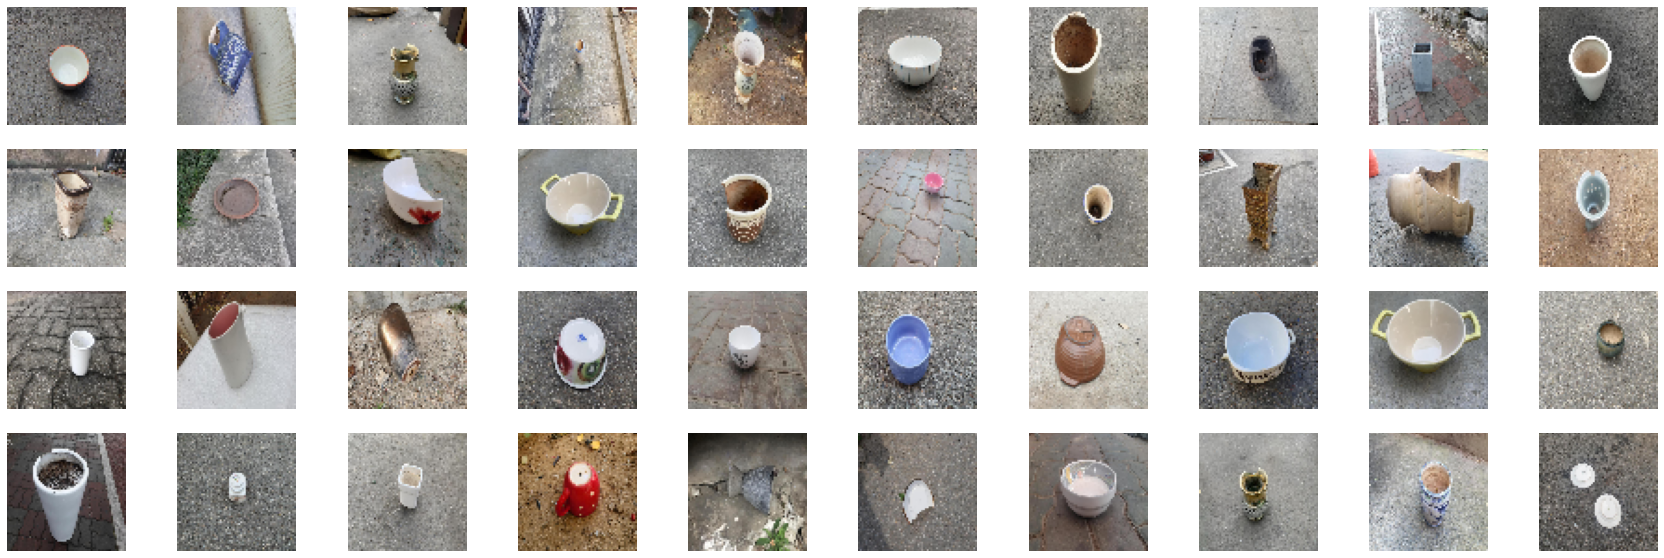

In [23]:
plt.figure(figsize=(30,10))

for n in range(len(validation_img_ceramic)):
    img = validation_img_ceramic[n]
    plt.subplot(4, 10, n+1)  #행은 class수 열은 시각화할 개수
    plt.imshow(img, cmap=plt.cm.binary)
    plt.axis("off")

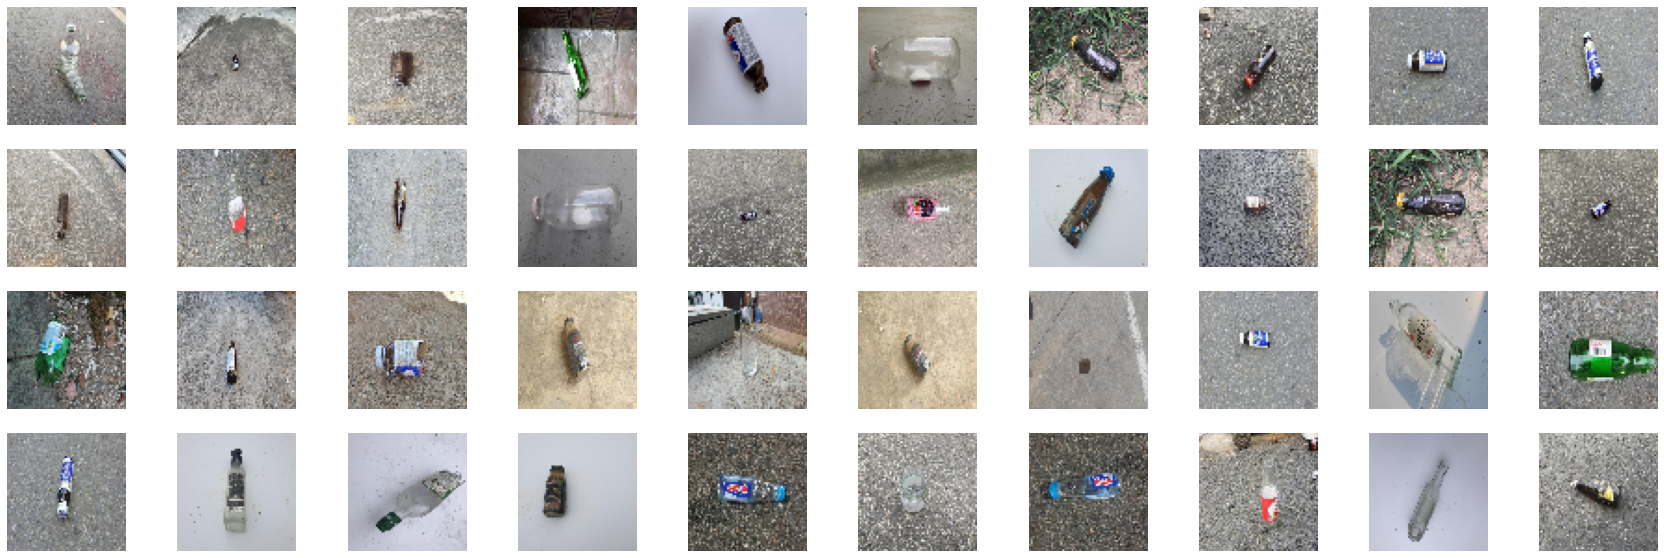

In [24]:
plt.figure(figsize=(30,10))
for n in range(len(validation_img_bottle)):
    img = validation_img_bottle[n]
    plt.subplot(4, 10, n+1)  #행은 class수 열은 시각화할 개수
    plt.imshow(img, cmap=plt.cm.binary)
    plt.axis("off")